# Aprendizagem de máquina

### Anotações
ω: varivel aleatoria
P(ωk):probabilidade a priori de observar ωk
p(x|ωj): funcao de densidade de probabilidade condicional de x dado que a classe é ωj
P(ωj|x): probabilidade da classe ser ωj dado que observou-se x

In [74]:
from math import ceil

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [175]:
#teste bayes

# import numpy as np
X = np.random.randint(50, size=(20, 3))
# print (X)
y = np.array([1, 1, 1, 1,1, 1,2, 2,2, 2,2, 2,])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X[:12], y[:12])
print (X[12:])
print(clf.predict(X[12:]))

[[ 4 18  3]
 [ 4 19 26]
 [20  1 19]
 [23 17 23]
 [16 41 27]
 [ 7 19  0]
 [19 16 39]
 [12 28 14]]
[2 2 1 1 2 2 1 2]


<IPython.core.display.Javascript object>


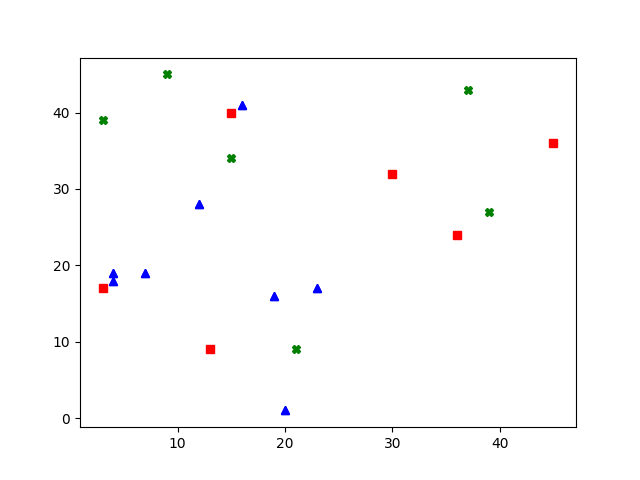

In [191]:
#plot
plt.plot(X[:6,0], X[:6,1], 'rs')
plt.plot(X[6:12,0], X[6:12,1],  'gX')
plt.plot(X[12:,0], X[12:,1], 'b^', X[12:,0], X[12:,1], 'b^')
plt.show()

## Leitura e Limpeza dos Dados

A leitura dos dados é feita utilizando a biblioteca `pandas`. O presente exemplo importa a base de dados `mammography`. Caso você esteja trabalhando com outro data set, modifique este trecho de código.
Para importar o conjunto de dados do PAKDD, use a função `pd.read_table` ao invés da `pd.read_csv`.

In [224]:
data_set = pd.read_csv('segmentation2.csv', skiprows=[0,1,2])
columns = data_set.columns.tolist()
aux = columns[0]
columns.pop(0)
columns[-1] = aux
# dt = data_set.reindex(columns=[aux])
data_set = data_set.reindex(columns=columns)
# print (dt)
# print (data_set[0])

In [225]:
# data_set = data_set.drop(range(1000,8000))
# pd.get_dummies(['male', 'female', "teste", "test", "dfhds", "dshf", "hdsf"])
# columns = data_set.columns.tolist()
# aux = columns[0]
# columns[0] = columns[-1]
# columns[-1] = aux
data_set['CLASS'] = data_set['CLASS'].map(lambda x : 0 if (x == 'GRASS') else x)
data_set['CLASS'] = data_set['CLASS'].map(lambda x : 1 if (x == 'PATH') else x)
data_set['CLASS'] = data_set['CLASS'].map(lambda x : 2 if (x == 'WINDOW') else x)
data_set['CLASS'] = data_set['CLASS'].map(lambda x : 3 if (x == 'CEMENT') else x)
data_set['CLASS'] = data_set['CLASS'].map(lambda x : 4 if (x == 'FOLIAGE') else x)
data_set['CLASS'] = data_set['CLASS'].map(lambda x : 5 if (x == 'SKY') else x)
data_set['CLASS'] = data_set['CLASS'].map(lambda x : 6 if (x == 'BRICKFACE') else x)
# data_set

# pd.get_dummies( data=data_set, columns = ['result'])
# data_set.reindex(columns=columns)


In [226]:
data_set = data_set.drop_duplicates(keep=False,inplace=False)  # Remove exemplos repetidos
# data_set

In [128]:
# Imprime as 5 primeiras linhas do data set
data_set.head(5)

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0                110.0                189.0                   9   
1                 86.0                187.0                   9   
2                225.0                244.0                   9   
3                 47.0                232.0                   9   
4                 97.0                186.0                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    1.000000  0.666667   
1                   0.0                   0.0    1.111111  0.720082   
2                   0.0                   0.0    3.388889  2.195113   
3                   0.0                   0.0    1.277778  1.254621   
4                   0.0                   0.0    1.166667  0.691215   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    1.222222  1.186342       12.925926    10.888889      9.222222   
1    1.444444  0.750309       13.740741    11.666667     10.333334   
2    3.000000  1.520234       12.259259    10.333334      9.333334   
3    1.000000  0.894427       12.703704    11.000000      9.000000   
4    1.166667  1.005540       15.592592    13.888889     11.777778   

   RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
0      18.666668   -6.111111   -11.111111     17.222221   18.666668   
1      19.222221   -6.222222   -10.222222     16.444445   19.222221   
2      17.111110   -5.777778    -8.777778     14.555555   17.111110   
3      18.111110   -5.111111   -11.111111     16.222221   18.111110   
4      21.111110   -5.111111   -11.444445     16.555555   21.111110   

   SATURATION-MEAN  CLASS  
0         0.508139      0  
1         0.463329      0  
2         0.480149      0  
3         0.500966      0  
4         0.442661      0

In [227]:
# Estatísticas sobre as variáveis
data_set.describe()

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
count          2072.000000          2072.000000              2072.0   
mean            124.667471           122.998552                 9.0   
std              72.863107            57.572816                 0.0   
min               1.000000            11.000000                 9.0   
25%              62.000000            81.000000                 9.0   
50%             121.000000           121.000000                 9.0   
75%             188.000000           169.250000                 9.0   
max             254.000000           251.000000                 9.0   

       SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2   VEDGE-MEAN     VEDGE-SD  \
count           2072.000000           2072.000000  2072.000000  2072.000000   
mean               0.015122              0.004612     1.893045     5.756815   
std                0.041263              0.023726     2.662145    45.289568   
min                0.000000              0.000000     0.000000     0.000000   
25%                0.000000              0.000000     0.722222     0.349603   
50%                0.000000              0.000000     1.222224     0.829630   
75%                0.000000              0.000000     2.222221     1.800201   
max                0.333333              0.222222    29.222221   991.718400   

        HEDGE-MEAN      HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
count  2072.000000  2.072000e+03     2072.000000  2072.000000   2072.000000   
mean      2.382722  7.678556e+00       37.225082    32.959138     44.401384   
std       3.449985  5.356269e+01       38.300919    35.154412     43.691345   
min       0.000000 -1.589457e-08        0.000000     0.000000      0.000000   
25%       0.819443  4.216376e-01        7.620370     7.111111      9.777778   
50%       1.444444  9.645273e-01       21.592592    19.666668     27.666667   
75%       2.555555  2.170293e+00       53.666668    47.694446     65.499998   
max      44.722225  1.386329e+03      143.444440   137.111110    150.888890   

       RAWGREEN-MEAN   EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN   VALUE-MEAN  \
count    2072.000000  2072.000000  2072.000000   2072.000000  2072.000000   
mean       34.314726   -12.797834    21.528904     -8.731070    45.368887   
std        36.461680    11.613456    19.726051     11.664625    43.073206   
min         0.000000   -49.666668   -12.444445    -33.888890     0.000000   
25%         6.333334   -18.694444     4.416667    -17.000000    11.888889   
50%        20.333334   -10.888889    19.777779    -11.000000    28.666666   
75%        46.805557    -4.305556    36.222220     -3.111111    65.499998   
max       142.555560     9.888889    82.000000     24.666666   150.888890   

       SATURATION-MEAN        CLASS  
count      2072.000000  2072.000000  
mean          0.427818     3.007722  
std           0.228650     1.999019  
min           0.000000     0.000000  
25%           0.284859     1.000000  
50%           0.375666     3.000000  
75%           0.540634     5.000000  
max           1.000000     6.000000

Agora vamos separar o data set em atributos dependentes (X = features) e independentes (y = classe). No caso do `mammography` a classe majoritária está codificada como -1 e a classe minoritária está codificada como 1. Para treinar nossa rede neural precisamos que os valores de classe sejam 0 e 1 (restrição da biblioteca `keras`), assim modificamos a codificação da majoritária para 0.

Perceba que esse pré-processamento varia de data set para data set.

In [228]:
#separando os dados da classe de dados

grass = data_set[data_set.CLASS == 0]
path = data_set[data_set.CLASS == 1]
window = data_set[data_set.CLASS == 2]
cement = data_set[data_set.CLASS == 3]
foliage = data_set[data_set.CLASS == 4]
sky = data_set[data_set.CLASS == 5]
brickface = data_set[data_set.CLASS == 6]

In [229]:
# major_train, major_test = train_test_split(grass, test_size = 1/4, random_state = 42)
# print (type(major_train))

<class 'pandas.core.frame.DataFrame'>


In [272]:
# dividindo os dados em 10 folds com a mesma quantidade de exemplos em cada fold
def dividir_em_grupos(grupos, numfolds = 10):
    
    def split_list(grupo, quant):
        grupos = []
        incremento = int(len(grupo)/quant)
        for g in range(0,len(grupo), incremento):
            grupos.append(grupo[g:g + incremento])
        return grupos[:quant]
    
    tam_grupo = 0
    for i, grupo in enumerate(grupos):
        grupos[i] = split_list(grupo, numfolds)
        tam_grupo = max(tam_grupo, len(grupos[i][0]))
    
    for i, grupo in enumerate(grupos):
        for j, g in enumerate(grupos[i]):
            grupos[i][j] = grupos[i][j].iloc[:,:].values
            if len(grupos[i][j]) < tam_grupo:
                grupos[i][j] = np.concatenate((grupos[i][j],grupos[i][j]), axis=0)
            grupos[i][j] = grupos[i][j][:tam_grupo]
#             print (len(grupos[i][j]))
    folds = []
    for i in range(0, numfolds):
        fold = np.concatenate((grupos[0][i], grupos[1][i],grupos[2][i],grupos[3][i],grupos[4][i],grupos[5][i],grupos[6][i]), axis=0)
        np.random.shuffle(fold)
        folds.append(fold)
#         print (len(fold[i]))
                
    return folds
grupos = dividir_em_grupos([grass, path, window, cement, foliage, sky, brickface])
# print (grupos[0][0])

## Divisão dos Dados em Treino, Validação, e Teste

Aqui dividimos o data set em treino, validação e teste de maneira estratificada.

In [284]:
def kfolds(grupos, i, k = 10):
    v = i%k
    t = (i + 1)%k
    validation = grupos.pop(max(v,t))
    test = grupos.pop(min(v,t))
#     print (validation[0])
    train = grupos[0]
    for grupo in grupos[1:]:
        train = np.concatenate((train, grupo), axis=0)
    
    return (train, validation, test)

def split(data, k = 10):
    folds = []
    for i in range(0,k):
        folds.append(kfolds(data[:], i))
    return folds

from sklearn.naive_bayes import MultinomialNB

t,v,te = kfolds(grupos[:], 0)

# print (t)

for t,v,te in split(grupos):
    scaler = StandardScaler()
    t_i = t[:,-1]
    t_f = scaler.fit_transform(t[:,:-1])
    v_i = v[:,-1]
    v_f = scaler.transform(v[:,:-1])
    te_i = te[:,-1]
    te_f = scaler.transform(te[:,:-1])
    print (t[0])
    clf = MultinomialNB()
    clf.fit(t_f, t_i)
    print(clf.score(v_f, v_i))
    print (clf.score(te_f, te_i))
#     print (X[12:])
#     print(clf.predict(X[12:]))
#     print (len(t), len(v), len(te))

[  37.           25.            9.            0.            0.            1.3333321
    0.73029673    0.9999962     0.76011676  126.03704     114.333336
  142.22223     121.55556     -35.11111      48.555557    -13.444445
  142.22223       0.19609308    5.        ]


ValueError: Input X must be non-negative

## Sampling dos Dados e Normalização

Para testar o comportamento da rede com diferentes funções de sampling, as mesmas devem ser implementadas e aplicadas ao conjunto de treinamento antes da normalização dos dados (você também pode investigar qual o efeito de aplicar o sampling após a normalização).

In [7]:
## TO DO -- Implementar as funções de sampling a serem utilizadas

É importante lembrar de normalizar os dados. A classe `StandardScaler` centraliza as variáveis e transforma as features para terem variância unitária. Você pode testar outras opções como o `MinMaxScaler`.

Todas as alternativas estão disponíveis em:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing.

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print (len(X_train))
print (len(X_val))

1036
518


## Definição e Treino da Rede

Aqui definimos a arquitetura da nossa rede neural e treinamos ela.

No presente exemplo a rede possui apenas uma camada escondida. O código é bem intuitivo e a adição de novas camadas pode ser feita através da função `add`.

Para treinar a rede várias funções de otimização estão disponíveis. 

Confira os exemplos em: https://keras.io/optimizers/

O treinamento da rede pode ser interrompido baseado na performance dela em um conjunto de validação através de callbacks.

Confira a documentação da classe `EarlyStopping`: https://keras.io/callbacks/

In [56]:
# Aqui criamos o esboço da rede.
classifier = Sequential()

# Agora adicionamos a primeira camada escondida contendo 16 neurônios e função de ativação
# tangente hiperbólica. Por ser a primeira camada adicionada à rede, precisamos especificar
# a dimensão de entrada (número de features do data set), que no caso do mammography são 6.
classifier.add(Dense(50, activation='relu', input_dim=19))

classifier.add(Dense(40, activation='relu',))

classifier.add(Dense(30, activation='relu',))

# classifier.add(Dense(30, activation='relu',))

classifier.add(Dense(15, activation='relu',))

classifier.add(Dense(8, activation='relu',))

# Em seguida adicionamos a camada de saída. Como nosso problema é binário só precisamos de
# 1 neurônio com função de ativação sigmoidal. A partir da segunda camada adicionada keras já
# consegue inferir o número de neurônios de entrada (16) e nós não precisamos mais especificar.
classifier.add(Dense(1, activation='relu'))

# Por fim compilamos o modelo especificando um otimizador, a função de custo, e opcionalmente
# métricas para serem observadas durante treinamento.
classifier.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Para treinar a rede passamos o conjunto de treinamento e especificamos o tamanho do mini-batch,
# o número máximo de épocas, e opcionalmente callbacks. No presente exemplo utilizamos early
# stopping para interromper o treinamento caso a performance não melhore em um conjunto de validação.
history = classifier.fit(X_train, y_train, batch_size=64, epochs=500,
                         validation_data=(X_val, y_val))                         
#                          callbacks=[early_stopping], validation_data=(X_val, y_val))

Train on 1036 samples, validate on 518 samples
Epoch 1/500
1036/1036 [==============================] - 0s - loss: 12.5037 - val_loss: 11.5107
Epoch 2/500
1036/1036 [==============================] - 0s - loss: 9.9457 - val_loss: 7.2888
Epoch 3/500
1036/1036 [==============================] - 0s - loss: 4.8837 - val_loss: 2.8726
Epoch 4/500
1036/1036 [==============================] - 0s - loss: 2.0576 - val_loss: 1.6245
Epoch 5/500
1036/1036 [==============================] - 0s - loss: 1.3973 - val_loss: 1.2734
Epoch 6/500
1036/1036 [==============================] - 0s - loss: 1.1338 - val_loss: 1.0383
Epoch 7/500
1036/1036 [==============================] - 0s - loss: 0.9388 - val_loss: 0.8827
Epoch 8/500
1036/1036 [==============================] - 0s - loss: 0.8095 - val_loss: 0.7552
Epoch 9/500
1036/1036 [==============================] - 0s - loss: 0.7152 - val_loss: 0.6922
Epoch 10/500
1036/1036 [==============================] - 0s - loss: 0.6415 - val_loss: 0.6011
Epoch 11/5

1036/1036 [==============================] - 0s - loss: 0.0278 - val_loss: 0.2555
Epoch 172/500
1036/1036 [==============================] - 0s - loss: 0.0292 - val_loss: 0.2197
Epoch 173/500
1036/1036 [==============================] - 0s - loss: 0.0356 - val_loss: 0.2537
Epoch 174/500
1036/1036 [==============================] - 0s - loss: 0.0337 - val_loss: 0.2376
Epoch 175/500
1036/1036 [==============================] - 0s - loss: 0.0286 - val_loss: 0.2517
Epoch 176/500
1036/1036 [==============================] - 0s - loss: 0.0309 - val_loss: 0.3273
Epoch 177/500
1036/1036 [==============================] - 0s - loss: 0.0414 - val_loss: 0.2341
Epoch 178/500
1036/1036 [==============================] - 0s - loss: 0.0386 - val_loss: 0.2524
Epoch 179/500
1036/1036 [==============================] - 0s - loss: 0.0288 - val_loss: 0.2663
Epoch 180/500
1036/1036 [==============================] - 0s - loss: 0.0300 - val_loss: 0.2751
Epoch 181/500
1036/1036 [=============================

1036/1036 [==============================] - 0s - loss: 0.0155 - val_loss: 0.2938
Epoch 342/500
1036/1036 [==============================] - 0s - loss: 0.0165 - val_loss: 0.2718
Epoch 343/500
1036/1036 [==============================] - 0s - loss: 0.0138 - val_loss: 0.2906
Epoch 344/500
1036/1036 [==============================] - 0s - loss: 0.0119 - val_loss: 0.2881
Epoch 345/500
1036/1036 [==============================] - 0s - loss: 0.0101 - val_loss: 0.2897
Epoch 346/500
1036/1036 [==============================] - 0s - loss: 0.0108 - val_loss: 0.2841
Epoch 347/500
1036/1036 [==============================] - 0s - loss: 0.0141 - val_loss: 0.2735
Epoch 348/500
1036/1036 [==============================] - 0s - loss: 0.0138 - val_loss: 0.2907
Epoch 349/500
1036/1036 [==============================] - 0s - loss: 0.0103 - val_loss: 0.2724
Epoch 350/500
1036/1036 [==============================] - 0s - loss: 0.0143 - val_loss: 0.2829
Epoch 351/500
1036/1036 [=============================

In [9]:
# Aqui criamos o esboço da rede.
classifier = Sequential()

# Agora adicionamos a primeira camada escondida contendo 16 neurônios e função de ativação
# tangente hiperbólica. Por ser a primeira camada adicionada à rede, precisamos especificar
# a dimensão de entrada (número de features do data set), que no caso do mammography são 6.
classifier.add(Dense(100, activation='relu', input_dim=6))

classifier.add(Dense(110, activation='relu',))

classifier.add(Dense(80, activation='relu',))

classifier.add(Dense(90, activation='relu',))

classifier.add(Dense(70, activation='relu',))

classifier.add(Dense(50, activation='relu',))

classifier.add(Dense(70, activation='relu',))

classifier.add(Dense(30, activation='relu',))

classifier.add(Dense(20, activation='relu',))

classifier.add(Dense(10, activation='relu',))

# Em seguida adicionamos a camada de saída. Como nosso problema é binário só precisamos de
# 1 neurônio com função de ativação sigmoidal. A partir da segunda camada adicionada keras já
# consegue inferir o número de neurônios de entrada (16) e nós não precisamos mais especificar.
classifier.add(Dense(1, activation='relu'))

# Por fim compilamos o modelo especificando um otimizador, a função de custo, e opcionalmente
# métricas para serem observadas durante treinamento.
classifier.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Para treinar a rede passamos o conjunto de treinamento e especificamos o tamanho do mini-batch,
# o número máximo de épocas, e opcionalmente callbacks. No presente exemplo utilizamos early
# stopping para interromper o treinamento caso a performance não melhore em um conjunto de validação.
history = classifier.fit(X_train, y_train, batch_size=64, epochs=150, 
                         callbacks=[early_stopping], validation_data=(X_val, y_val))

Train on 3922 samples, validate on 1961 samples
Epoch 1/150
3922/3922 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0321
Epoch 2/150
3922/3922 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0321
Epoch 3/150
3922/3922 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0321
Epoch 4/150
3922/3922 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0321
Epoch 5/150
3922/3922 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0321
Epoch 6/150
3922/3922 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0321
Epoch 7/150
3922/3922 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0321


In [35]:
# treinando a rede utilizando os kfolds
histories = []
# for train_index, test_index in kfolds.split(data):
# for fold in grupos:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     print (len(X_test), len(X_train))
    histories.append(classifier.fit(X_train, y_train, batch_size=64, epochs=150, 
                             callbacks=[early_stopping], validation_data=(X_test, y_test)))

Train on 3922 samples, validate on 1961 samples
Epoch 1/150
3922/3922 [==============================] - 0s - loss: 0.0248 - val_loss: 0.0219
Epoch 2/150
3922/3922 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0199
Epoch 3/150
3922/3922 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0202
Epoch 4/150
3922/3922 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0188
Epoch 5/150
3922/3922 [==============================] - 0s - loss: 0.0195 - val_loss: 0.0193
Epoch 6/150
3922/3922 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0180
Epoch 7/150
3922/3922 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0176
Epoch 8/150
3922/3922 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0178
Epoch 9/150
3922/3922 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0167
Epoch 10/150
3922/3922 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0175
Epoch 11/15

In [ ]:
#cross validation score
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=6, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

print ("aqui")
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=0)
print (model)
print ("aqui 2")
kfold = StratifiedKFold(n_splits=10, shuffle=True)
print (kfold)
print ("aqui 3")
results = cross_val_score(model, X, y, cv=kfold)
print (results)
print ("aqui 4")
print(results.mean())

aqui
aqui 2
StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
aqui 3


In [10]:
#utilizado para salvar os pesos da rede
classifier.save_weights("pesos.h5", overwrite=True)

Algumas funções auxiliares.

In [53]:
def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

<IPython.core.display.Javascript object>


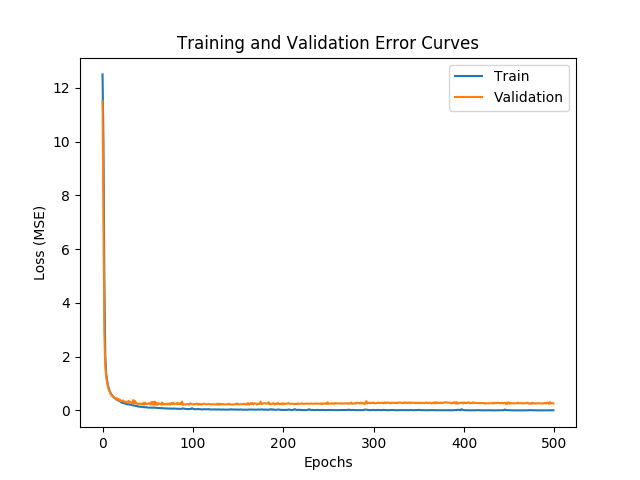

In [57]:
plot_training_error_curves(history)

<IPython.core.display.Javascript object>


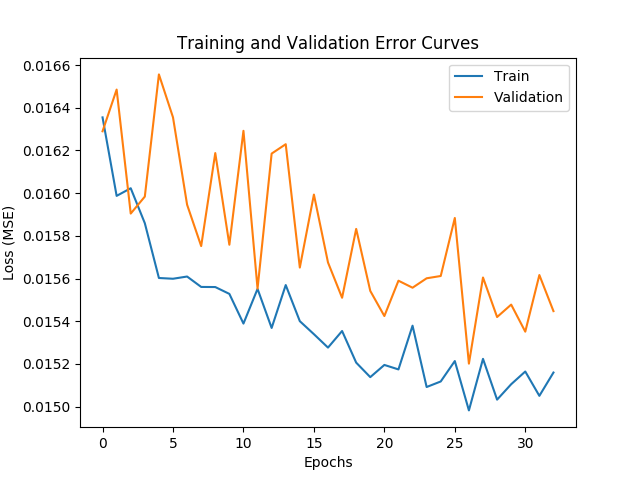

<IPython.core.display.Javascript object>


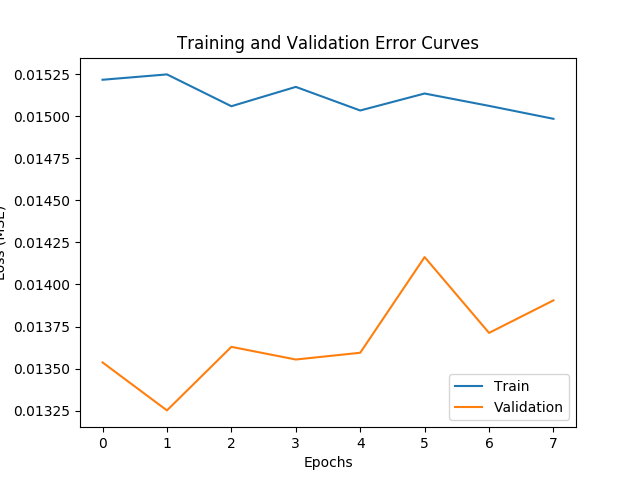

<IPython.core.display.Javascript object>


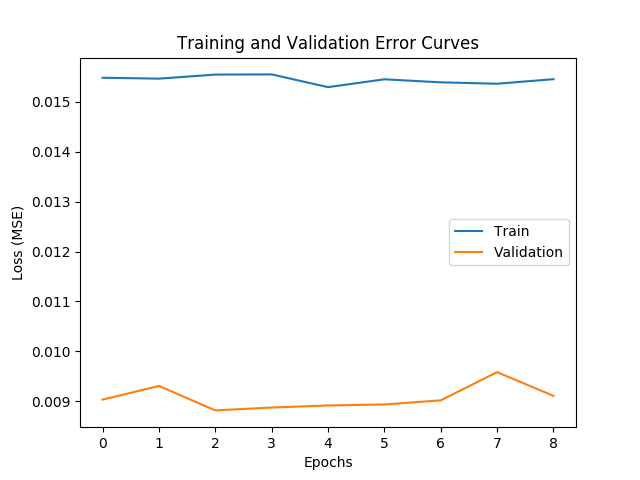

<IPython.core.display.Javascript object>


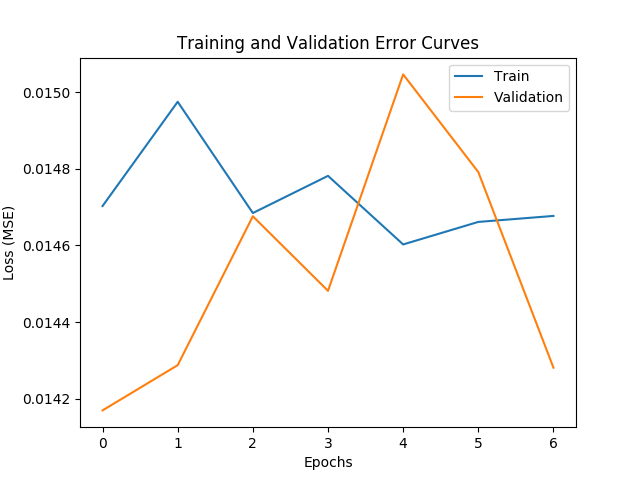

<IPython.core.display.Javascript object>


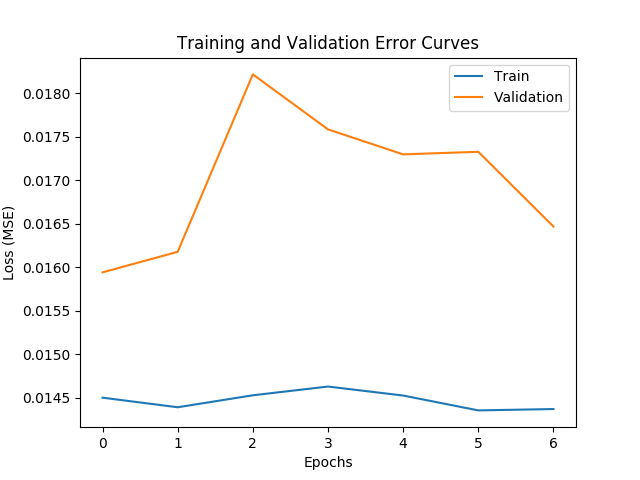

<IPython.core.display.Javascript object>


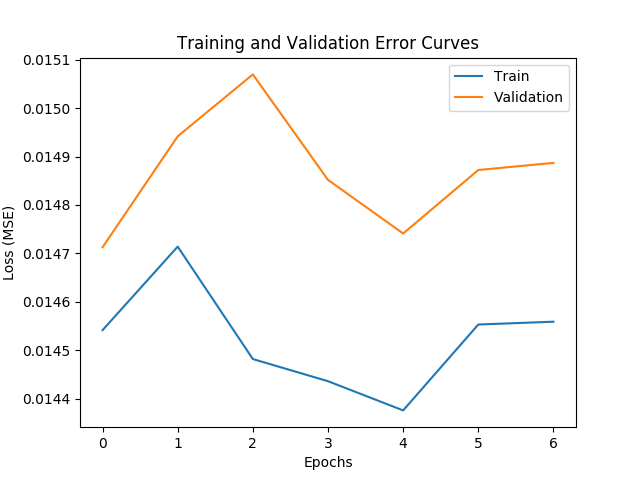

<IPython.core.display.Javascript object>


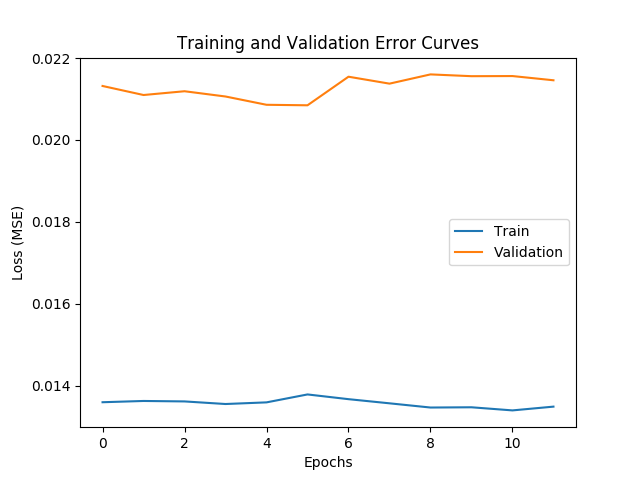

<IPython.core.display.Javascript object>


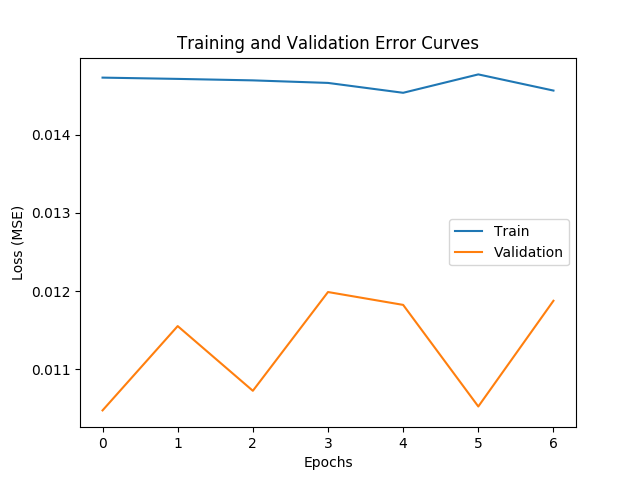

<IPython.core.display.Javascript object>


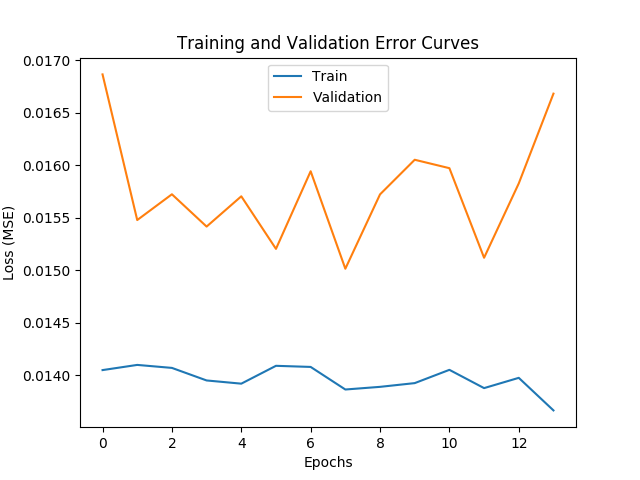

<IPython.core.display.Javascript object>


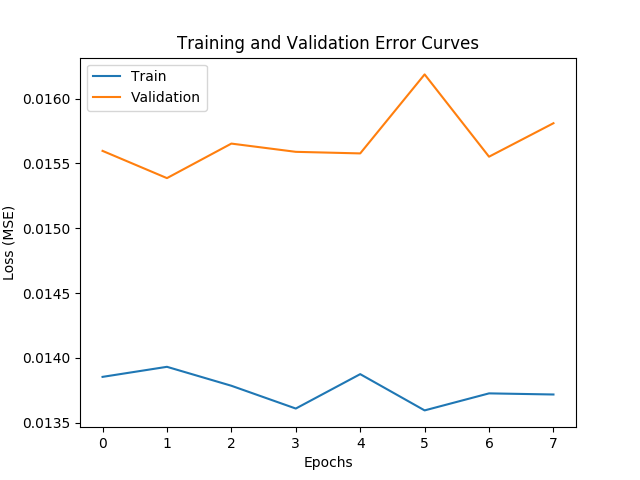

In [36]:
# plot k folds 
for h in histories:
    plot_training_error_curves(h)

In [38]:
# imprimindo a media e o desvio
historiesnp = []
for h in histories:
    historiesnp.append(h.history)
print("%.2f (+/- %.2f)" % (np.mean(historiesnp), np.std(historiesnp)))

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

## Predições no Conjunto de Teste

Agora utilizamos a nossa rede para fazer predições no conjunto de teste e computar métricas de desempenho.

Além das métricas utilizadas aqui, mais métricas de desempenho podem ser encontradas em: http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [19]:
## Fazer predições no conjunto de teste
y_pred = classifier.predict(X_test)
y_pred_class = classifier.predict_classes(X_test, verbose=0)

## Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_test, y_pred_class))

## Computar métricas de desempenho
losses = extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy_score(y_test, y_pred_class)))
print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall_score(y_test, y_pred_class)))
print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision_score(y_test, y_pred_class)))
print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1_score(y_test, y_pred_class)))
print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=roc_auc_score(y_test, y_pred)))

Matriz de confusão
[[1891    8]
 [  28   35]]

Train Loss:       0.0134
Validation Loss:  0.0126
Accuracy:         0.9817
Recall:           0.5556
Precision:        0.8140
F1:               0.6604
AUROC:            0.8829
